In [1]:
Pkg.add("PGFPlots")
Pkg.add("Iterators")
Pkg.add("BayesNets")
Pkg.add("LightGraphs")
Pkg.add("TikzGraphs")
Pkg.add("Discretizers")
Pkg.add("RDatasets")
Pkg.add("Plots")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PGFPlots
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Iterators
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of BayesNets
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of LightGraphs
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of TikzGraphs
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Discretizers
INFO: Use `Pkg

In [2]:
using Iterators
using LightGraphs
using BayesNets
using PGFPlots
using TikzGraphs
using Discretizers
using RDatasets
using Plots

In [9]:
movieData = readtable("movie_metadata.csv")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,num_genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Timothy Hines,1,111,0,247,Kelly LeBrock,1000,14616,Drama,1,Christopher Lambert,10 Days in a Madhouse,314,2059,Alexandra Callas,1,NA,http://www.imdb.com/title/tt3453052/?ref_=fn_tt_tt_1,10,English,USA,R,12000000,2015,445,7.5,1.85,26000
2,Color,Jennifer Wynne Farmer,2,107,0,236,Akima,752,10508,Drama,1,Irene Bedard,Naturally Native,103,1763,Max Gail,4,cosmetics|female protagonist|native american|native american protagonist|sister sister relationship,http://www.imdb.com/title/tt0133117/?ref_=fn_tt_tt_1,6,English,USA,PG-13,700000,1998,282,6.5,NA,102
3,Color,Johnny Remo,2,112,74,891,Randy Wayne,260000,96734,Action|Drama,2,Matthew Ziff,Hardflip,606,263584,Raquel Elizabeth Ames,3,family relationships|loss of mother|san diego california|single mother|suicide attempt,http://www.imdb.com/title/tt1907639/?ref_=fn_tt_tt_1,5,English,USA,PG-13,1000000,2012,984,5.6,1.85,706
4,Color,Franklin J. Schaffner,2,118,76,249,William Hootkins,902,800000,Adventure|Mystery|Thriller,3,Frank Langella,Sphinx,892,2079,John Gielgud,0,bat|curse|egyptologist|mummy|murder,http://www.imdb.com/title/tt0083113/?ref_=fn_tt_tt_1,21,English,USA,PG,14000000,1981,488,5.2,2.35,106
5,Color,Mike Bruce,3,78,6,17,Kirpatrick Thomas,32,243768,Western,1,Joseph Campanella,The Legend of God's Gun,143,72,Christian Anderson,0,NA,http://www.imdb.com/title/tt1073221/?ref_=fn_tt_tt_1,9,English,USA,R,30000,2007,17,4.1,2.35,13
6,Color,Kurt Hale,3,101,0,17,Big Budah,69,1111615,Comedy|Crime|Family,3,Kirby Heyborne,The R.M.,651,155,Curt Doussett,0,latter day saints|missionary|pickup truck|police|video camera,http://www.imdb.com/title/tt0341540/?ref_=fn_tt_tt_1,34,English,USA,PG,500000,2003,34,6.0,NA,44
7,Color,Ray Griggs,4,92,4,12,Chris Cox,93,425899,Documentary,1,Bill Farmer,I Want Your Money,1123,168,Mike Huckabee,0,NA,http://www.imdb.com/title/tt1560957/?ref_=fn_tt_tt_1,31,English,USA,PG,400000,2010,31,5.1,1.78,638
8,Color,Robert Fontaine,4,125,7,17,Arturo Castro,128,3330,Crime|Drama,2,Michael Derek,Mi America,22,214,Brad Lee Wind,0,NA,http://www.imdb.com/title/tt2460506/?ref_=fn_tt_tt_1,1,English,USA,R,2100000,2015,22,7.2,2.35,305
9,Color,Sterling Van Wagenen,4,100,0,266,Eric Johnson,1000,2024854,Drama|Western,2,Emily Podleski,The Work and the Glory II: American Zion,564,1942,Brenda Strong,2,estrangement|missouri|mormon|mormon church|mormon temple,http://www.imdb.com/title/tt0457530/?ref_=fn_tt_tt_1,21,English,USA,PG-13,6500000,2005,373,6.6,2.35,19
10,Color,Kurt Hale,5,102,0,15,Lincoln Hoppe,69,1250798,Comedy|Drama|Romance,3,Kirby Heyborne,The Singles Ward,1099,161,Daryn Tufts,0,church|love|marriage|mormon|single,http://www.imdb.com/title/tt0306069/?ref_=fn_tt_tt_1,53,English,USA,PG,500000,2002,24,6.4,NA,43


In [10]:
#variables:
#Gross (query variable)
#Budget (evidence/input variable)
#Genre (evidence/input variable)
#IMDB score (evidence/input variable)
#Number of critic reviews (evidence/input variable)
#Number of Movie facebook likes
#Total cast facebook likes
#Number of faces in movie poster
#Director facebook likes
#Content rating
#Duration
#Title year


In [34]:
#data discretization
nbinsLarge = 7
nbinsSmall = 3

gross_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:gross])
gross_discretizer = LinearDiscretizer(gross_edges)

budget_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:budget])
budget_discretizer = LinearDiscretizer(budget_edges)

imdbScore_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:imdb_score])
imdbScore_discretizer = LinearDiscretizer(imdbScore_edges)

critic_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:num_critic_for_reviews])
critic_discretizer = LinearDiscretizer(critic_edges)

numMovieFacebookLikes_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:movie_facebook_likes])
numMovieFacebookLikes_discretizer = LinearDiscretizer(numMovieFacebookLikes_edges)

castMovieLikes_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:cast_total_facebook_likes])
castMovieLikes_discretizer = LinearDiscretizer(castMovieLikes_edges)

numFacesInPoster_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:facenumber_in_poster])
numFacesInPoster_discretizer = LinearDiscretizer(numFacesInPoster_edges)

directorFacebookLikes_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:director_facebook_likes])
directorFacebookLikes_discretizer = LinearDiscretizer(directorFacebookLikes_edges)

contentRating_discretizer = CategoricalDiscretizer(movieData[:content_rating])

duration_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:duration])
duration_discretizer = LinearDiscretizer(duration_edges)

titleYear_edges = binedges(DiscretizeUniformWidth(nbinsLarge), movieData[:title_year])
titleYear_discretizer = LinearDiscretizer(titleYear_edges)

Discretizers.LinearDiscretizer{Float64,Int64}([1929.0,1941.43,1953.86,1966.29,1978.71,1991.14,2003.57,2016.0],7,Dict(7=>7,4=>4,2=>2,3=>3,5=>5,6=>6,1=>1),Dict(7=>7,4=>4,2=>2,3=>3,5=>5,6=>6,1=>1),true)

In [35]:
dataUndiscretized = DataFrame(
    gross = movieData[:gross], #encode(gross_discretizer, movieData[:gross]),
    budget = movieData[:budget],#encode(budget_discretizer, movieData[:budget]),
    imdbScore = movieData[:imdb_score],#encode(imdbScore_discretizer, movieData[:imdb_score]),
    numCriticReviews = movieData[:num_critic_for_reviews],#encode(critic_discretizer, movieData[:num_critic_for_reviews]),
    numGenres = movieData[:num_genres],
)

dataDiscretized = DataFrame(
    gross = encode(gross_discretizer, movieData[:gross]),
    budget = encode(budget_discretizer, movieData[:budget]),
    numGenres = movieData[:num_genres],
    imdbScore = encode(imdbScore_discretizer, movieData[:imdb_score]),
    numCriticReviews = encode(critic_discretizer, movieData[:num_critic_for_reviews]),
    numMovieFacebookLikes = encode(numMovieFacebookLikes_discretizer, movieData[:movie_facebook_likes]),
    castMovieLikes = encode(castMovieLikes_discretizer, movieData[:cast_total_facebook_likes]),
    numFacesInPoster = encode(numFacesInPoster_discretizer, movieData[:facenumber_in_poster]),
    directorFacebookLikes = encode(directorFacebookLikes_discretizer, movieData[:director_facebook_likes]),
    contentRating = encode(contentRating_discretizer, movieData[:content_rating]),
    duration = encode(duration_discretizer, movieData[:duration]),
    titleYear = encode(titleYear_discretizer, movieData[:title_year]),
) 

,gross,budget,numGenres,imdbScore,numCriticReviews,numMovieFacebookLikes,castMovieLikes,numFacesInPoster,directorFacebookLikes,contentRating,duration,titleYear
1,1,1,1,6,1,1,1,1,1,1,2,7
2,1,1,1,5,1,1,1,1,1,2,2,6
3,1,1,2,4,1,1,3,1,1,2,2,7
4,1,1,3,4,1,1,1,1,1,3,2,5
5,1,1,1,3,1,1,1,1,1,1,1,7
6,1,1,3,5,1,1,1,1,1,3,2,6
7,1,1,1,4,1,1,1,1,1,3,2,7
8,1,1,2,6,1,1,1,1,1,1,3,7
9,1,1,2,5,1,1,1,1,1,2,2,7
10,1,1,3,5,1,1,1,1,1,3,2,6


In [36]:
totalSize = length(dataDiscretized[1])
percentageTrain = 0.7
lastTrainExample = Int(floor(percentageTrain*totalSize))

2131

In [37]:
#writetable("output.csv", data)
#dataUndiscretized = dataUndiscretized[1:20,:]
#display(dataUndiscretized)

dataDiscretizedTrain = dataDiscretized[1:lastTrainExample,:]
dataDiscretizedTest = dataDiscretized[lastTrainExample+1:totalSize,:]
#display(dataDiscretizedTrain)
#display(dataDiscretizedTest)

,gross,budget,numGenres,imdbScore,numCriticReviews,numMovieFacebookLikes,castMovieLikes,numFacesInPoster,directorFacebookLikes,contentRating,duration,titleYear
1,1,1,1,6,1,1,1,1,1,1,2,7
2,1,1,1,5,1,1,1,1,1,2,2,6
3,1,1,2,4,1,1,3,1,1,2,2,7
4,1,1,3,4,1,1,1,1,1,3,2,5
5,1,1,1,3,1,1,1,1,1,1,1,7
6,1,1,3,5,1,1,1,1,1,3,2,6
7,1,1,1,4,1,1,1,1,1,3,2,7
8,1,1,2,6,1,1,1,1,1,1,3,7
9,1,1,2,5,1,1,1,1,1,2,2,7
10,1,1,3,5,1,1,1,1,1,3,2,6


,gross,budget,numGenres,imdbScore,numCriticReviews,numMovieFacebookLikes,castMovieLikes,numFacesInPoster,directorFacebookLikes,contentRating,duration,titleYear
1,1,1,3,5,2,1,2,1,1,1,2,7
2,1,1,3,5,2,1,1,1,1,2,2,7
3,2,1,3,7,2,1,1,1,1,3,2,5
4,1,2,5,5,2,1,1,1,1,1,2,7
5,1,2,5,6,2,1,1,1,1,1,3,7
6,1,2,5,6,2,1,1,1,1,1,3,6
7,1,3,3,5,2,1,1,1,1,3,2,7
8,1,3,2,4,2,1,1,1,1,2,2,7
9,2,3,4,4,2,1,1,1,1,2,2,6
10,2,3,2,5,2,1,1,1,1,2,3,7


In [40]:
#structure learning
params = K2GraphSearch([:gross, :budget, :numGenres, :imdbScore, :numCriticReviews, :numMovieFacebookLikes, :castMovieLikes, :numFacesInPoster, :directorFacebookLikes, :contentRating, :duration, :titleYear],
                        DiscreteCPD,
                        max_n_parents=4)
#CategoricalCPD{Categorical{Float64}}
#DiscreteCPD

BayesNets.K2GraphSearch(Symbol[:castMovieLikes,:numFacesInPoster,:directorFacebookLikes,:contentRating,:duration,:titleYear,:gross,:budget,:numGenres,:imdbScore,:numCriticReviews,:numMovieFacebookLikes],DataType[BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}},BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float6

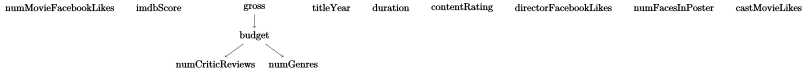

In [41]:
bn = fit(BayesNet, dataDiscretizedTrain, params)

In [ ]:
function likelihoodWeightedSampling(table, value)
    numerator = 0
    denominator = 0  
    for i = 1:length(table[:,1])
        row = table[i,:]
        if row[:gross][1] == value
            numerator = numerator + row[:p][1]
        end
        denominator = denominator + row[:p][1]
    end
    return numerator./denominator
end

In [ ]:
function getMostLikelyClass(table,numClasses)
    highestLikelihood = 0
    mostLikelyClass = -1
    for i = 1:numClasses
        likelihood = likelihoodWeightedSampling(table,i)
        #display(likelihood)
        if likelihood > highestLikelihood
            highestLikelihood = likelihood
            mostLikelyClass = i
        end
    end
    return mostLikelyClass
end

In [ ]:
#getMostLikelyClass(table,5)

In [ ]:
function getPredictionError(testDataTable)
    numMistakes = 0
    for i = 1:length(testDataTable[:,1])
        row = testDataTable[i,:]
        gross = row[:gross][1]
        budget = row[:budget][1]
        imdbScore = row[:imdbScore][1]
        numCriticReviews = row[:numCriticReviews][1]
        numGenres = row[:numGenres][1]
        
        table = rand_table_weighted(bn; nsamples=300, consistent_with=Assignment(:budget=>budget,:imdbScore=>imdbScore,:numCriticReviews=>numCriticReviews, :numGenres=>numGenres))
        
        predictedGrossCategory = getMostLikelyClass(table,5)
        
        if predictedGrossCategory != gross
            numMistakes += 1
        end
        
    end
    return numMistakes/length(testDataTable[:,1])
end

In [ ]:
getPredictionError(dataDiscretizedTest)

In [ ]:
#structure learning
#params2 = K2GraphSearch([:gross, :budget, :imdbScore, :numCriticReviews, :numGenres], 
#                       ConditionalLinearGaussianCPD,
#                       max_n_parents=2)
#bn2 = fit(BayesNet, dataUndiscretized, params2)

In [ ]:
params = GreedyHillClimbing(ScoreComponentCache(dataDiscretized), max_n_parents=3, prior=UniformPrior())
bn = fit(DiscreteBayesNet, dataDiscretized, params)

In [ ]:
bayesian_score(bn, dataDiscretized, params.prior)